In [2]:
from utils import *
from matplotlib.ticker import MultipleLocator
import vice
from vice.yields.presets import JW20
import dill

# Plot settings
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (4, 4),
    'font.family': 'STIXgeneral',
    'mathtext.fontset': 'cm',
})

In [4]:
# Import data
data_dir = '/mnt/c/Users/dubay.11/OneDrive - The Ohio State University/Documents/Docs/First Year Project/Data'
# data_dir = '~/Documents/Data'
data = pd.read_csv(Path(data_dir) / 'dr17_cut_data.csv')
data

APOGEE_ID TELESCOPE        FIELD ALT_ID          RA  \
0       2M00000002+7417074    apo25m       120+12   none    0.000103   
1       2M00000035-7323394    lco25m        SMC12   none    0.001467   
2       2M00000068+5710233    apo25m        N7789   none    0.002850   
3       2M00000133+5721163    apo25m  NGC7789_btx   none    0.005558   
4       2M00000211+6327470    apo25m       117+01   none    0.008802   
...                    ...       ...          ...    ...         ...   
387942  2M23595837+5700444    apo25m        N7789   none  359.993224   
387943  2M23595867-7339039    lco25m        SMC12   none  359.994493   
387944  2M23595886+5726058    apo25m       116-04   none  359.995265   
387945  2M23595921+5609479    apo25m  NGC7789_MGA   none  359.996744   
387946  2M23595949-7342592    lco25m        SMC12   none  359.997887   

              DEC        GLON       GLAT       J  J_ERR  ...  APOKASC2_AGE  \
0       74.285408  119.401807  11.767414   8.597  0.039  ...           NaN   
1      -73.394287  307.939441 -43.230305  15.008  0.045  ...           NaN   
2       57.173164  115.977154  -5.002392  10.664  0.023  ...           NaN   
3       57.354549  116.014776  -4.824917  13.261  0.029  ...           NaN   
4       63.463078  117.227985   1.162167  11.880  0.024  ...           NaN   
...           ...         ...        ...     ...    ...  ...           ...   
387942  57.012356  115.939899  -5.158948  12.657  0.026  ...           NaN   
387943 -73.651093  307.846602 -42.982597  15.671  0.069  ...           NaN   
387944  57.434956  116.025359  -4.745011  11.466  0.024  ...           NaN   
387945  56.163330  115.771964  -5.991363  11.985  0.023  ...           NaN   
387946 -73.716454  307.821174 -42.919934  15.924  0.094  ...           NaN   

        APOKASC2_AGE_PERR  APOKASC2_AGE_MERR  APOKASC2_AV  APOKASC2_AV_ERR  \
0                     NaN                NaN          NaN              NaN   
1                     NaN                NaN          NaN              NaN   
2                     NaN                NaN          NaN              NaN   
3                     NaN                NaN          NaN              NaN   
4                     NaN                NaN          NaN              NaN   
...                   ...                ...          ...              ...   
387942                NaN                NaN          NaN              NaN   
387943                NaN                NaN          NaN              NaN   
387944                NaN                NaN          NaN              NaN   
387945                NaN                NaN          NaN              NaN   
387946                NaN                NaN          NaN              NaN   

       APOKASC2_NOTE  APOK2_MASS  APOK2_MASS_ERR  APOK2_RADIUS  \
0               none         NaN             NaN           NaN   
1               none         NaN             NaN           NaN   
2               none         NaN             NaN           NaN   
3               none         NaN             NaN           NaN   
4               none         NaN             NaN           NaN   
...              ...         ...             ...           ...   
387942          none         NaN             NaN           NaN   
387943          none         NaN             NaN           NaN   
387944          none         NaN             NaN           NaN   
387945          none         NaN             NaN           NaN   
387946          none         NaN             NaN           NaN   

        APOK2_RADIUS_ERR  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
387942               NaN  
387943               NaN  
387944               NaN  
387945               NaN  
387946               NaN  

[387947 rows x 301 columns]

In [11]:
# Fiducial model: default settings, power-law DTD, 40 Myr minimum delay time
simtime = np.linspace(0, 12.5, 1251)
# vice.milkyway.migration.stars = vice.toolkit.hydrodisk.hydrodiskstars(...)
mw = vice.milkyway(name='milkyway/fiducial', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.run(simtime)

Output directory already exists. Overwriting will delete all of its contents, leaving only the results of the current simulation.
Output directory: milkyway/fiducial.vice
Overwrite? (y | n)  n


In [109]:
# Fiducial model with exponential DTD
mw = vice.milkyway(name='milkyway/exponential', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = 'exp'
mw.tau_Ia = 3 # Gyr
mw.run(simtime, overwrite=True)

In [110]:
# Fiducial model with wide gaussian DTD
def gauss(t, sigma=1, center=1):
    return np.exp(-(t-center)**2/(2*sigma**2))

mw = vice.milkyway(name='milkyway/wide_gauss', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = lambda t: gauss(t, sigma=2, center=3)
mw.run(simtime, overwrite=True)

In [111]:
# Fiducial + narrow Gaussian
mw = vice.milkyway(name='milkyway/narrow_gauss', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = lambda t: gauss(t, sigma=0.2, center=1)
mw.run(simtime, overwrite=True)

In [112]:
# Fiducial + bimodal DTD
def bimodal(t, tau_ia=0.09):
    if t < tau_ia:
        return 10**(1.4 - 50*(np.log10(t*1e9) - 7.7)**2)
    else:
        return 10**(-0.8 - 0.9*(np.log10(t*1e9) - 8.7)**2)

mw = vice.milkyway(name='milkyway/bimodal', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = bimodal
mw.run(simtime, overwrite=True)

In [113]:
# Fiducial + uniform DTD
def uniform(t, tmin=0, tmax=1):
    return int(t>=tmin and t<tmax)

mw = vice.milkyway(name='milkyway/uniform', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = uniform
mw.run(simtime, overwrite=True)

In [25]:
# Power-law DTD with different mass-loading functions
ycc_o = vice.yields.ccsne.settings['o']
z_solar_o = vice.solar_z['o']
def eta(rgal, gradient=-0.08, mode4=0.3, recycling=0.4):
    # Set [alpha/H] at 8 kpc to be 0
    exp = -gradient * (rgal - 4) - mode4
    return (ycc_o / z_solar_o) * 10 ** exp + recycling - 1

mw = vice.milkyway(name='milkyway/shallow_eta', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = 'plaw'
mw.mass_loading = lambda r: eta(r, gradient=-0.06)
mw.run(simtime)

mw = vice.milkyway(name='milkyway/steep_eta', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = 'plaw'
# slightly adjust mode at 4 kpc to keep eta positive
mw.mass_loading = lambda r: eta(r, gradient=-0.10, mode4=0.28)
mw.run(simtime)

Output directory already exists. Overwriting will delete all of its contents, leaving only the results of the current simulation.
Output directory: milkyway/shallow_eta.vice
Overwrite? (y | n)  n
Output directory already exists. Overwriting will delete all of its contents, leaving only the results of the current simulation.
Output directory: milkyway/steep_eta.vice
Overwrite? (y | n)  n


/home/dubay.11/.local/lib/python3.8/site-packages/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: stars
  warnings.warn("""\
/home/dubay.11/.local/lib/python3.8/site-packages/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: func
  warnings.warn("""\


In [48]:
# Power-law DTD with different infall rates

mw = vice.milkyway(name='milkyway/low_ifr', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = 'plaw'
mw.evolution = lambda r, t: 0.5
mw.mode = 'ifr'
mw.run(simtime)

mw = vice.milkyway(name='milkyway/high_ifr', N=2e5, zone_width=1.0)
mw.delay = 0.04 # Gyr
mw.RIa = 'plaw'
mw.evolution = lambda r, t: 2.
mw.mode = 'ifr'
mw.run(simtime)

/home/dubay.11/.local/lib/python3.8/site-packages/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: stars
  warnings.warn("""\


In [6]:
def multi_zone_plot(vice_names, x, y, data_source='astroNN', zones=[4, 8, 12], xlim=None, ylim=None, 
                    lookback_offset=-2.5, nrows=1, title='', width=12, fmt=[], labels=[], legend_title=None):
    """
    Plot VICE simulation against data for multiple radial zones.
    
    Parameters
    ----------
    vice_names : str
        Name(s) of multizone VICE output directory(ies).
    x : str
        Parameter to plot on x-axis. Must be 'age' or '[fe/h]'.
    y : str
        Parameter to plot on y-axis. Must be '[fe/h]' or '[o/fe]'.
    data_source : str, optional [default : 'astroNN']
        Source for abundance data (age will always be from astroNN). Must be 'astroNN' or 'ASPCAP'.
    zones : array-like, optional [default : [4, 8, 12]]
        List of radial zones to plot.
    xlim : tuple, optional [default : None]
        Shared x-axis bounds for all panels. If None, default values will be chosen according
        to the x parameter.
    ylim : tuple, optional [default : None]
        Shared y-axis bounds for all panels. If None, default values will be chosen according
        to the y parameter.
    lookback_offset : float, optional [default : -2.5]
        Offset for VICE lookback times in Gyr. Adjust so that simulation and data timescales align.
    nrows : int, optional [default : 1]
        Number of rows of axes.
    title : str, optional [default : '']
        Figure title.
    width : float, optional [default : 10]
        Width of figure in inches.
    fmt : list, optional [default : []]
        Plot formatting for VICE outputs. If empty or incomplete, the default matplotlib formatting is used.
    labels : list, optional [default : []]
        Labels of VICE outputs to show in legend. If empty, defaults to the entries in vice_names.
    legend_title : str or None, optional
        Title for legend. Default is None, for no title.  
    
    """
    # Figure dimensions
    n = len(zones)
    ncols = int(np.ceil(n/nrows))
    height = 1.25 * (nrows / ncols) * width
    fig, axs = plt.subplots(nrows, ncols, figsize=(width, height), 
                            sharex=True, sharey=True, tight_layout=True)
    # Set data sources and settings for x-axis
    if x == 'age':
        xdatacol = 'ASTRONN_AGE'
        xvicecol = 'lookback'
        if xlim is None:
            xlim = (-1, 13)
        xlabel = 'astroNN age [Gyr]'
        x_major_locator = 5
        x_minor_locator = 1
    elif x == 'met':
        if data_source == 'astroNN':
            xdatacol = 'ASTRONN_FE_H'
            xlabel = 'astroNN [Fe/H]'
        elif data_source == 'ASPCAP':
            xdatacol = 'M_H'
            xlabel = 'ASPCAP [M/H]'
        xvicecol = '[fe/h]'
        if xlim is None:
            xlim = (-2.1, 0.6)
        x_major_locator = 0.5
        x_minor_locator = 0.1
    # Set data source and settings for y-axis
    if y == 'met':
        if data_source == 'astroNN':
            ydatacol = 'ASTRONN_FE_H'
            ylabel = 'astroNN [Fe/H]'
        elif data_source == 'ASPCAP':
            ydatacol = 'M_H'
            ylabel = 'ASPCAP [M/H]'
        yvicecol = '[fe/h]'
        if ylim is None:
            ylim = (-2.1, 0.6)
        y_major_locator = 0.5
        y_minor_locator = 0.1
    elif y == 'alpha':
        if data_source == 'astroNN':
            ydatacol = 'ASTRONN_O_FE'
            ylabel = 'astroNN [O/Fe]'
        elif data_source == 'ASPCAP':
            ydatacol = 'ALPHA_FE'
            ylabel = r'ASPCAP [$\alpha$/Fe]'
        yvicecol = '[o/fe]'
        if ylim is None:
            ylim = (-0.2, 0.5)
        y_major_locator = 0.2
        y_minor_locator = 0.05
    
    # Convert VICE output name to list if only one provided
    if type(vice_names) == str:
        vice_names = [vice_names]
    # Append default formatting if provided list is insufficient
    if len(fmt) < len(vice_names):
        fmt += ['' for i in range(len(vice_names) - len(fmt))]
    # Use VICE directory names as legend labels if provided list is insufficient
    if len(labels) != len(vice_names):
        labels = vice_names
    # Import VICE output(s)
    outputs = [vice.output('milkyway/' + vice_name) for vice_name in vice_names]
    # Horizontal offset for VICE results
    lookback_offset = min(lookback_offset, -1)
    vice_end = int(lookback_offset * 100)    
    
    # Plot data in each zone
    for i, z in enumerate(zones):
        # Select axis
        row = int(i/ncols)
        col = i % ncols
        if nrows > 1:
            ax = axs[row, col]
        else:
            ax = axs[col]
        # Plot data within radial zone
        data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
        scatter_hist(ax, data_zone[xdatacol], data_zone[ydatacol], xlim=xlim, ylim=ylim)
        # Plot VICE output within zone
        for i, out in enumerate(outputs):
            vice_hist = out.zones['zone%s' % z].history
            xvicearr = np.array(vice_hist[xvicecol][:vice_end])
            if xvicecol == 'lookback':
                xvicearr += lookback_offset
            ax.plot(xvicearr, vice_hist[yvicecol][:vice_end], fmt[i], label=labels[i])
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        # Set axis tick locators
        ax.xaxis.set_major_locator(MultipleLocator(x_major_locator))
        ax.xaxis.set_minor_locator(MultipleLocator(x_minor_locator))
        ax.yaxis.set_major_locator(MultipleLocator(y_major_locator))
        ax.yaxis.set_minor_locator(MultipleLocator(y_minor_locator))
        # Axis labels on outside of grid only
        if row == nrows - 1:
            ax.set_xlabel(xlabel)
        if col == 0:
            ax.set_ylabel(ylabel)
        ax.set_title(r'%s$\leq R <$%s kpc' % (z, z+1))

    if len(vice_names) > 1:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, title=legend_title)
    fig.suptitle(title)
    plt.show()

In [7]:
def single_zone_plot(vice_names, zone, tlim=(-1, 13), felim=(-2.1, 0.6), olim=(-0.2, 0.5), 
                     data_source='astroNN', lookback_offset=-2.5, title='', width=12, fmt=[], 
                     labels=[], legend_title=None):
    """
    Plot [Fe/H] vs age, [O/Fe] vs age, and [O/Fe] vs [Fe/H] for a single radial zone.
    
    Parameters
    ----------
    vice_names : list
        Name of VICE output directory or directories.
    zone : int
        Index of radial zone.
    tlim : tuple, optional
        Plot bounds for age or lookback time in Gyr. Default is (-1, 13).
    felim : tuple, optional
        Plot bounds for [Fe/H]. Default is (-2.1, 0.6).
    olim : tuple, optional
        Plot bounds for [O/Fe]. Default is (-0.2, 0.5).
    data_source : str, optional [default : 'astroNN']
        Source for abundance data (age will always be from astroNN). Must be 'astroNN' or 'ASPCAP'.
    lookback_offset : float, optional [default : -2.5]
        Offset for VICE lookback times in Gyr. Adjust so that simulation and data timescales align.
    title : str, optional [default : '']
        Figure title.
    width : float, optional [default : 12]
        Width of figure in inches.
    fmt : list, optional [default : []]
        Plot formatting for VICE outputs. If empty or incomplete, the default matplotlib formatting is used.
    labels : list, optional [default : []]
        Labels of VICE outputs to show in legend. If empty, defaults to the entries in vice_names.
    legend_title : str or None, optional
        Title for legend. Default is None, for no title.        
    
    """
    fig, axs = plt.subplots(1, 3, figsize=(width, width/3))
    
    # Data column names depending on data source
    if data_source == 'astroNN':
        fe_data_col = 'ASTRONN_FE_H'
        fe_ax_label = 'astroNN [Fe/H]'
        o_data_col = 'ASTRONN_O_FE'
        o_ax_label = 'astroNN [O/Fe]'
    elif data_source == 'ASPCAP':
        fe_data_col = 'M_H'
        fe_ax_label = 'ASPCAP [M/H]'
        o_data_col = 'ALPHA_M'
        o_ax_label = r'ASPCAP [$\alpha$/M]'
        
    # Limit data within radial zone
    data_zone = data[(data['ASTRONN_GALR'] >= zone) & (data['ASTRONN_GALR'] < zone+1)]
    # Horizontal offset for VICE results
    lookback_offset = min(lookback_offset, -1)
    vice_end = int(lookback_offset * 100)
    
    # Convert VICE output name to list if only one provided
    if type(vice_names) == str:
        vice_names = [vice_names]
    # Append default formatting if provided list is insufficient
    if len(fmt) < len(vice_names):
        fmt += ['' for i in range(len(vice_names) - len(fmt))]
    # Use VICE directory names as legend labels if provided list is insufficient
    if len(labels) != len(vice_names):
        labels = vice_names
    # Plot VICE outputs
    for i, vice_name in enumerate(vice_names):
        out = vice.output('milkyway/' + vice_name)
        vice_hist = out.zones['zone%s' % zone].history
        axs[0].plot(np.array(vice_hist['lookback'][:vice_end]) + lookback_offset, 
                vice_hist['[fe/h]'][:vice_end], fmt[i], label=labels[i])
        axs[1].plot(np.array(vice_hist['lookback'][:vice_end]) + lookback_offset, 
                vice_hist['[o/fe]'][:vice_end], fmt[i])
        axs[2].plot(vice_hist['[fe/h]'][:vice_end], vice_hist['[o/fe]'][:vice_end], fmt[i])
    
    # First panel: metallicity vs time
    ax = axs[0]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone[fe_data_col], xlim=tlim, ylim=felim)
    ax.set_xlim(tlim)
    ax.set_ylim(felim)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_xlabel('astroNN age [Gyr]')
    ax.set_ylabel(fe_ax_label)

    # Second panel: alpha vs time
    ax = axs[1]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone[o_data_col], xlim=tlim, ylim=olim)
    ax.set_xlim(tlim)
    ax.set_ylim(olim)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.set_xlabel('astroNN age [Gyr]')
    ax.set_ylabel(o_ax_label)

    # Third panel: alpha vs fe
    ax = axs[2]
    scatter_hist(ax, data_zone[fe_data_col], data_zone[o_data_col], xlim=felim, ylim=olim)
    ax.set_xlim(felim)
    ax.set_ylim(olim)
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.set_xlabel(fe_ax_label)
    ax.set_ylabel(o_ax_label)
    
    if len(vice_names) > 1:
        fig.legend(title=legend_title)
    if title == '':
        title = r'$%s \leq R < %s$ kpc' % (zone, zone+1)
    fig.suptitle(title)
    plt.show()

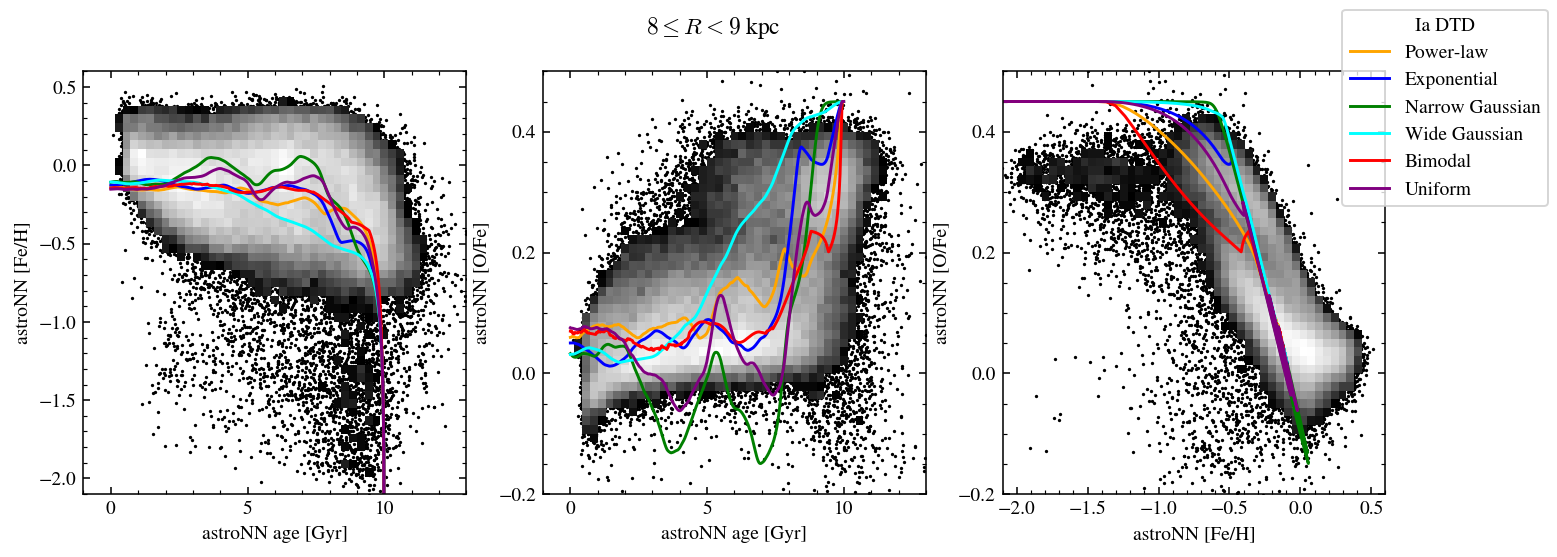

In [8]:
# Plot all DTDs vs data
dtds = ['fiducial', 'exponential', 'narrow_gauss', 'wide_gauss', 'bimodal', 'uniform']
# dtd_labels = ['Power-law (slope=-1.1)', r'Exponential ($\tau_{\rm{Ia}}=3$ Gyr)',
#               r'Narrow Gaussian ($\mu=1$ Gyr, $\sigma=0.2$ Gyr)',
#               r'Wide Gaussian ($\mu=3$ Gyr, $\sigma=2$ Gyr)',
#               r'Bimodal ($\mu_1=0.05$ Gyr, $\mu_2=0.5$ Gyr)',
#               r'Uniform ($t_{\rm{max}}=1$ Gyr)']
dtd_labels = ['Power-law', 'Exponential', 'Narrow Gaussian', 'Wide Gaussian', 'Bimodal', 'Uniform']
colors = ['orange', 'blue', 'green', 'cyan', 'red', 'purple']
single_zone_plot(dtds, 8, labels=dtd_labels, fmt=colors, legend_title='Ia DTD')

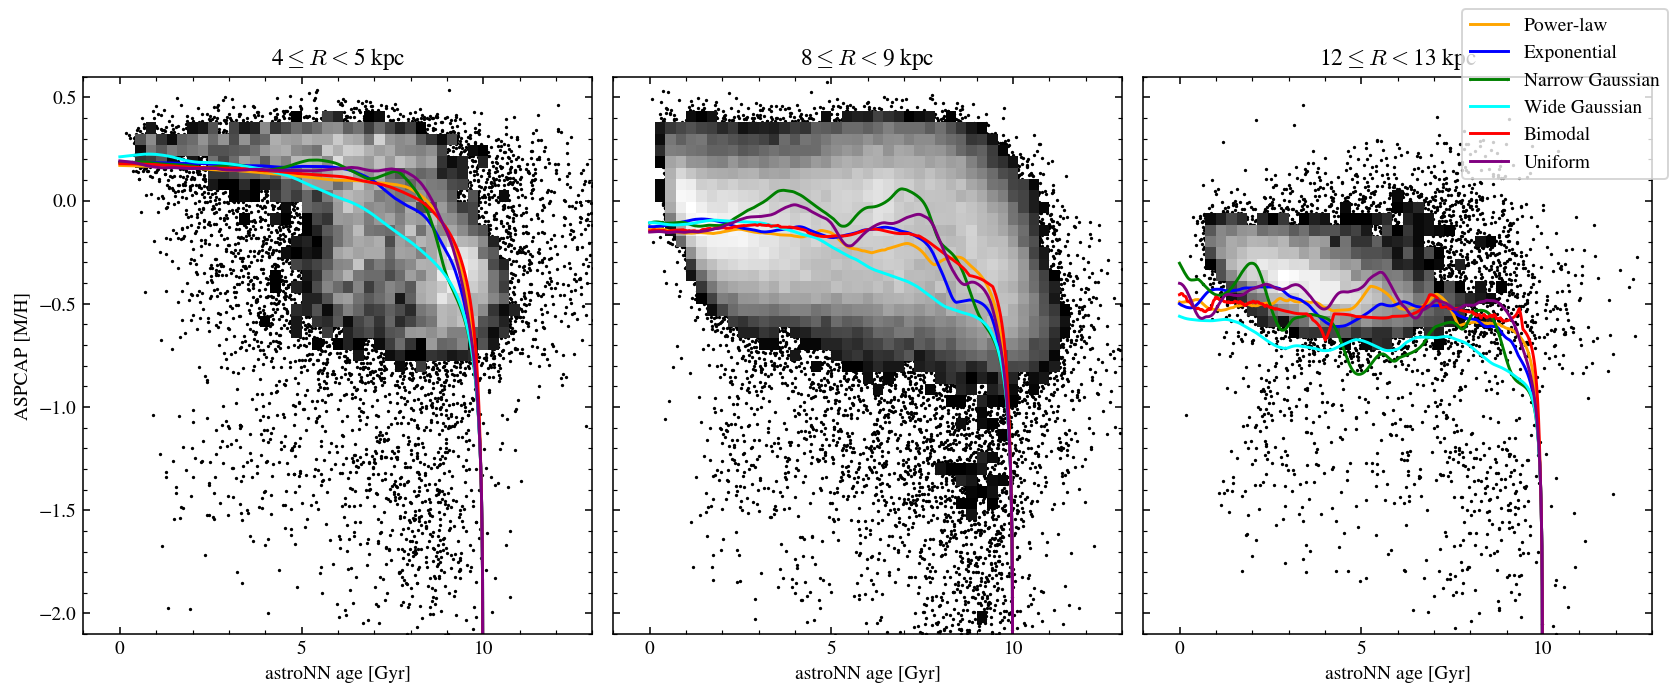

In [52]:
multi_zone_plot(dtds, 'age', 'met', zones=[4, 8, 12], labels=dtd_labels, fmt=colors, data_source='ASPCAP')

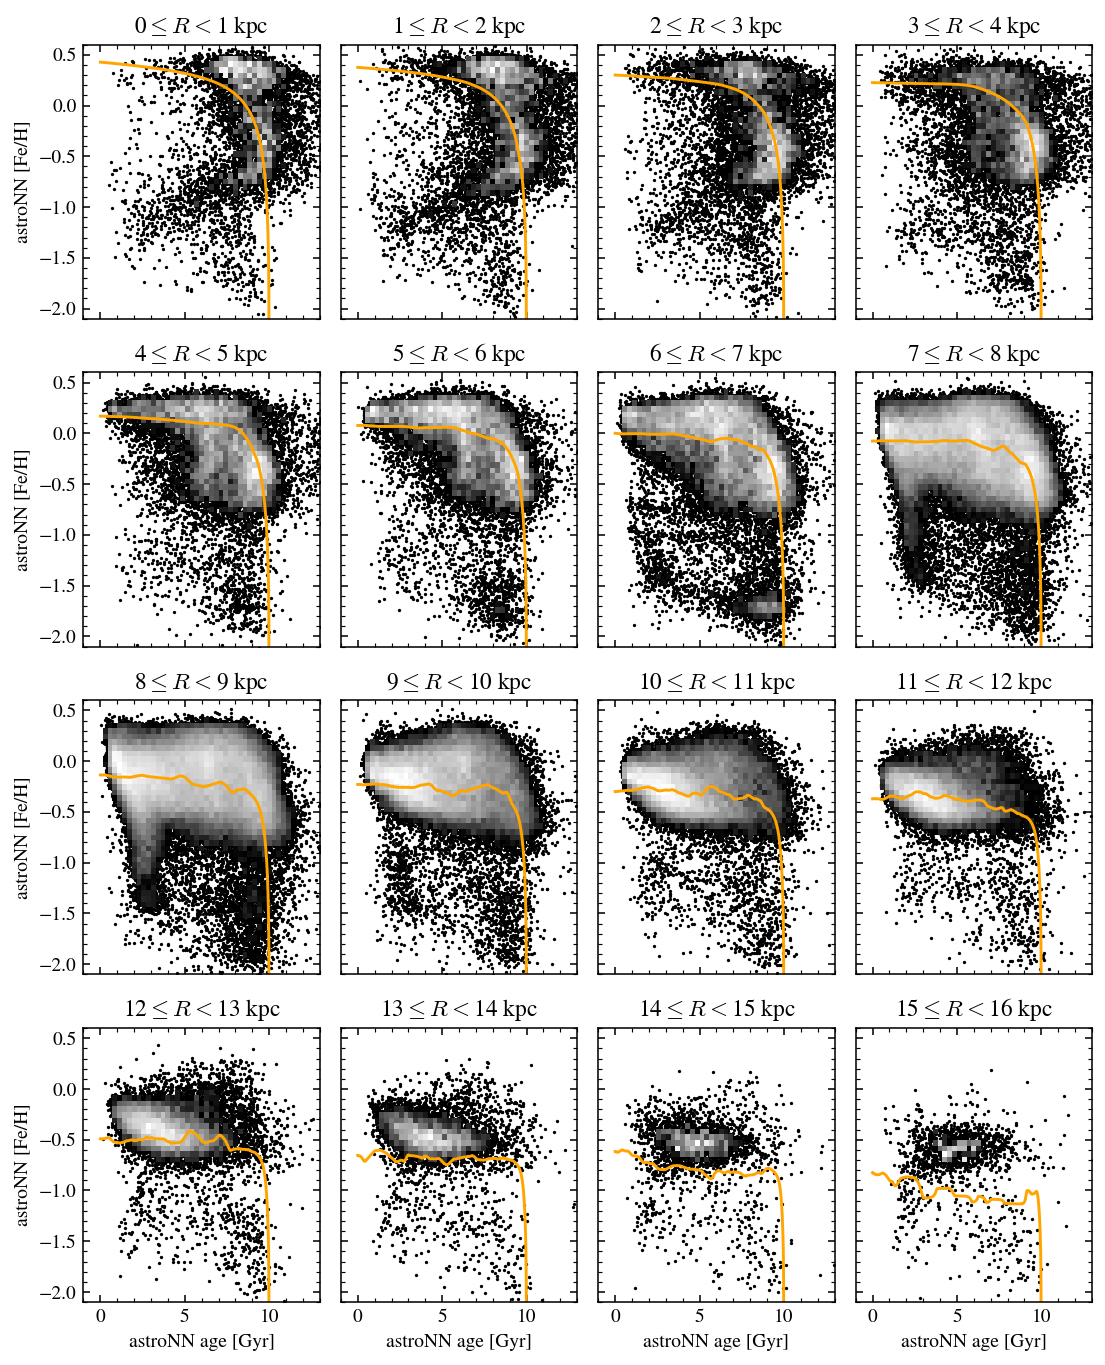

In [61]:
multi_zone_plot('fiducial', 'age', 'met', zones=list(range(16)), fmt=colors, data_source='astroNN', nrows=4, width=8)

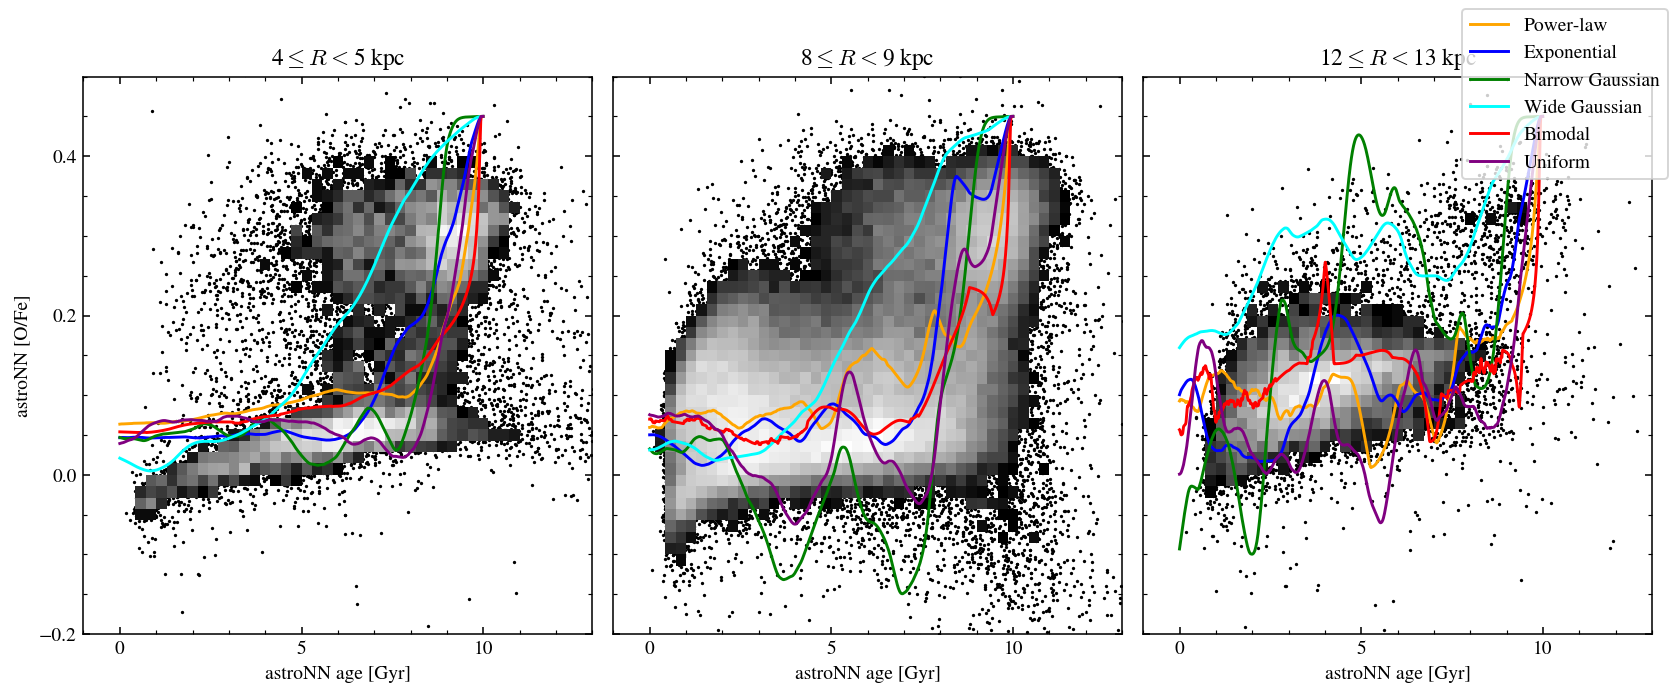

In [8]:
multi_zone_plot(dtds, 'age', 'alpha', zones=[4, 8, 12], labels=dtd_labels, fmt=colors)

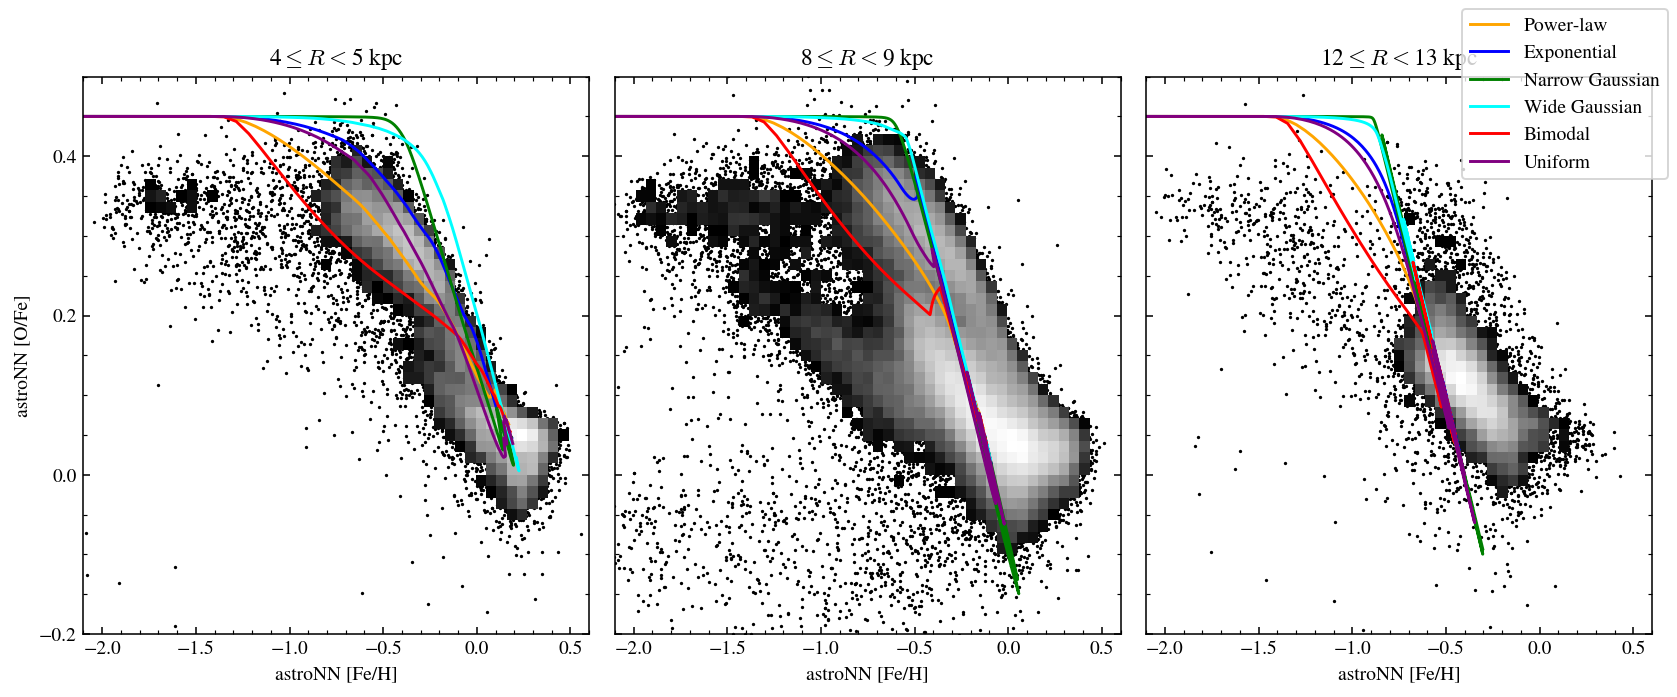

In [6]:
multi_zone_plot(dtds, 'met', 'alpha', zones=[4, 8, 12], labels=dtd_labels, fmt=colors)

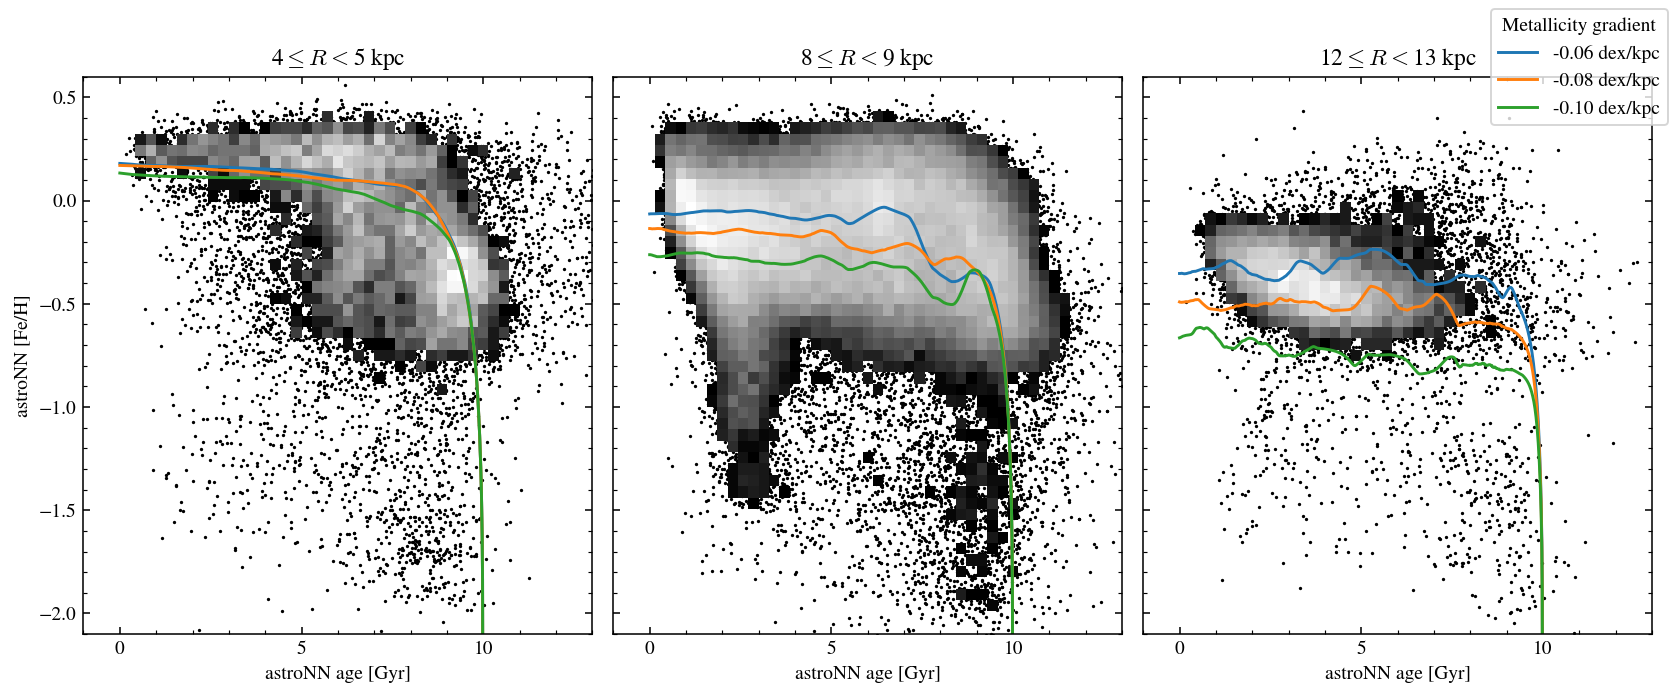

In [41]:
multi_zone_plot(['shallow_eta', 'fiducial', 'steep_eta'], 'age', 'met', zones=[4, 8, 12], labels=['-0.06 dex/kpc', '-0.08 dex/kpc', '-0.10 dex/kpc'], legend_title='Metallicity gradient')

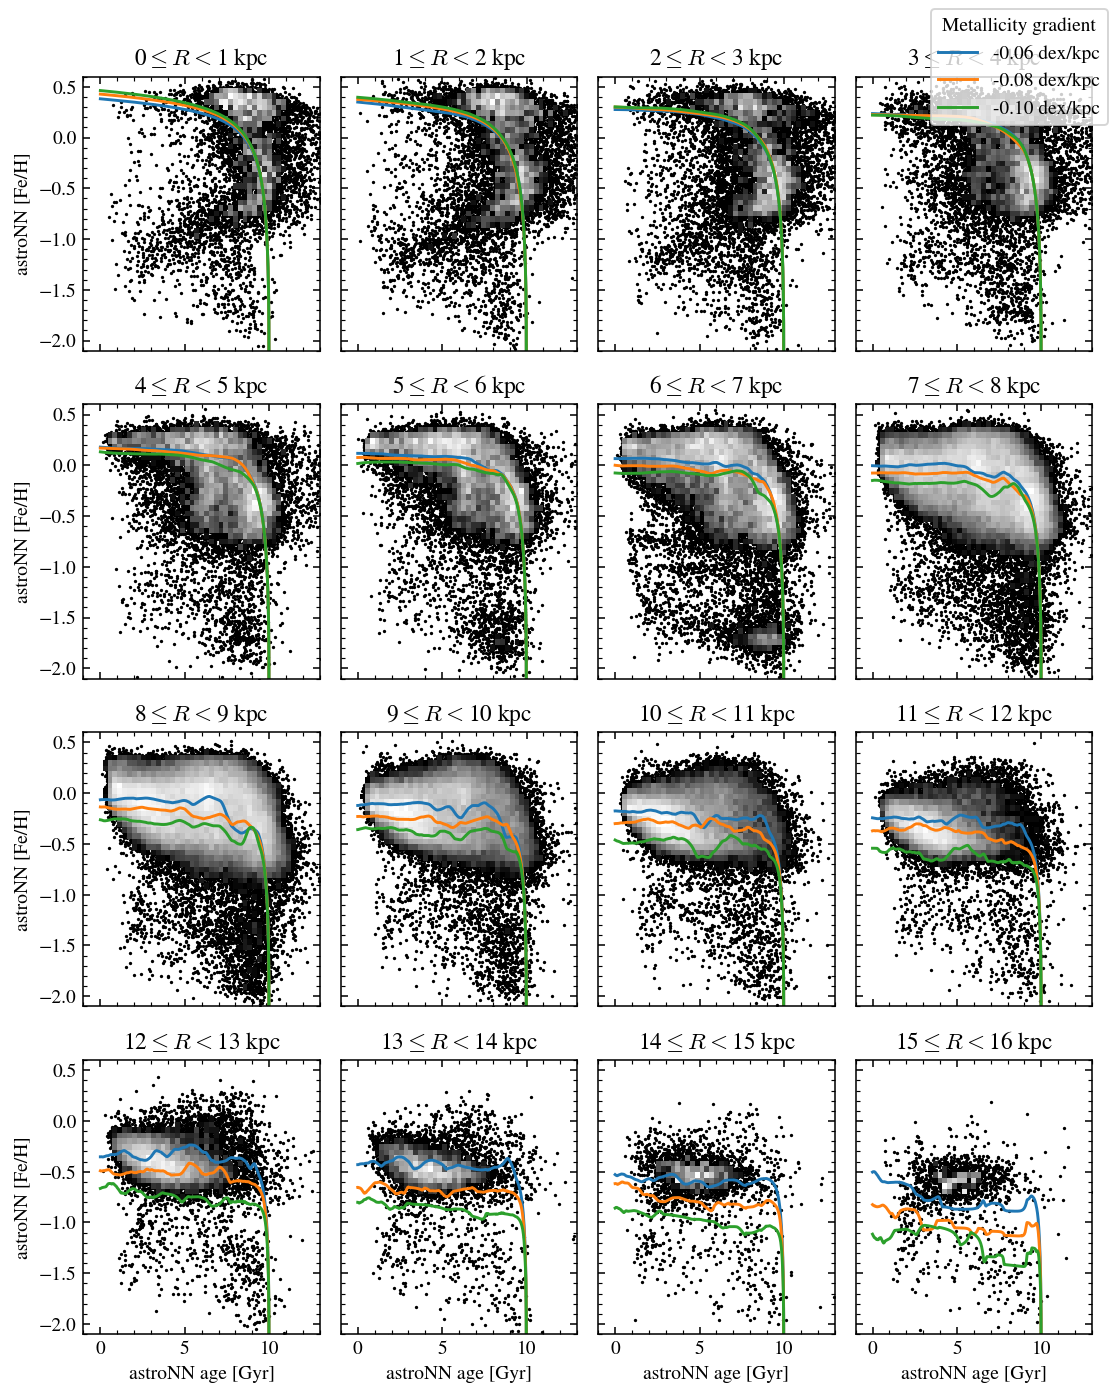

In [68]:
multi_zone_plot(['shallow_eta', 'fiducial', 'steep_eta'], 'age', 'met', zones=list(range(16)), nrows=4, labels=['-0.06 dex/kpc', '-0.08 dex/kpc', '-0.10 dex/kpc'], legend_title='Metallicity gradient', width=8)

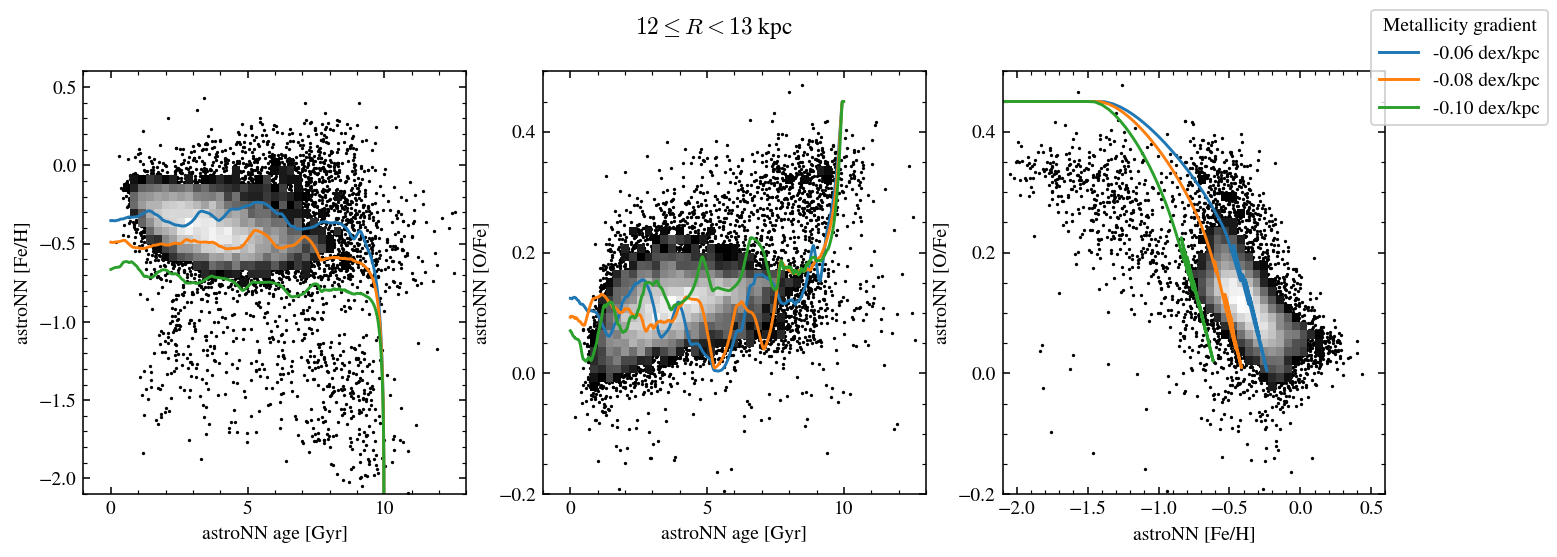

In [42]:
single_zone_plot(['shallow_eta', 'fiducial', 'steep_eta'], 12, labels=['-0.06 dex/kpc', '-0.08 dex/kpc', '-0.10 dex/kpc'], legend_title='Metallicity gradient')

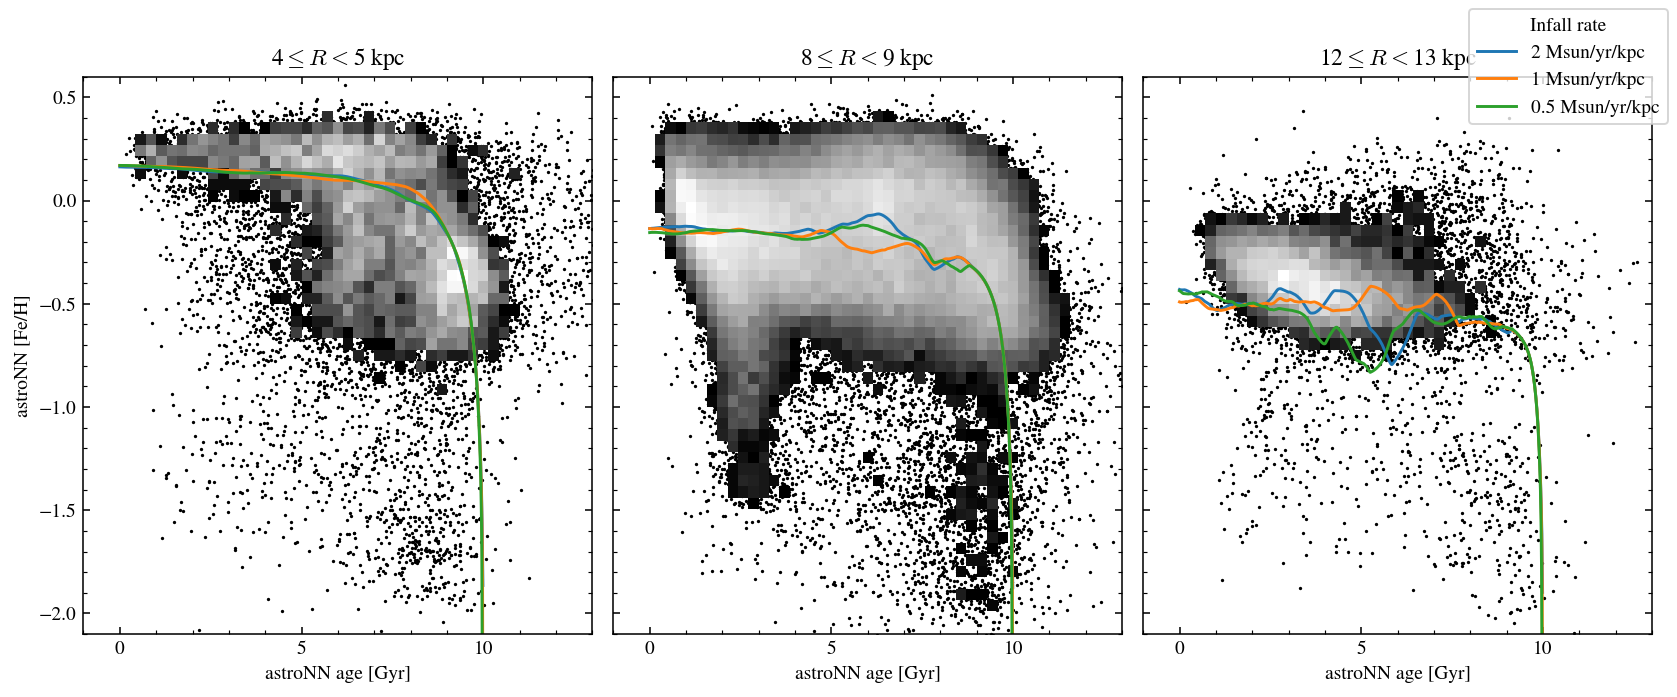

In [49]:
multi_zone_plot(['high_ifr', 'fiducial', 'low_ifr'], 'age', 'met', zones=[4, 8, 12], labels=['2 Msun/yr/kpc', '1 Msun/yr/kpc', '0.5 Msun/yr/kpc'], legend_title='Infall rate')

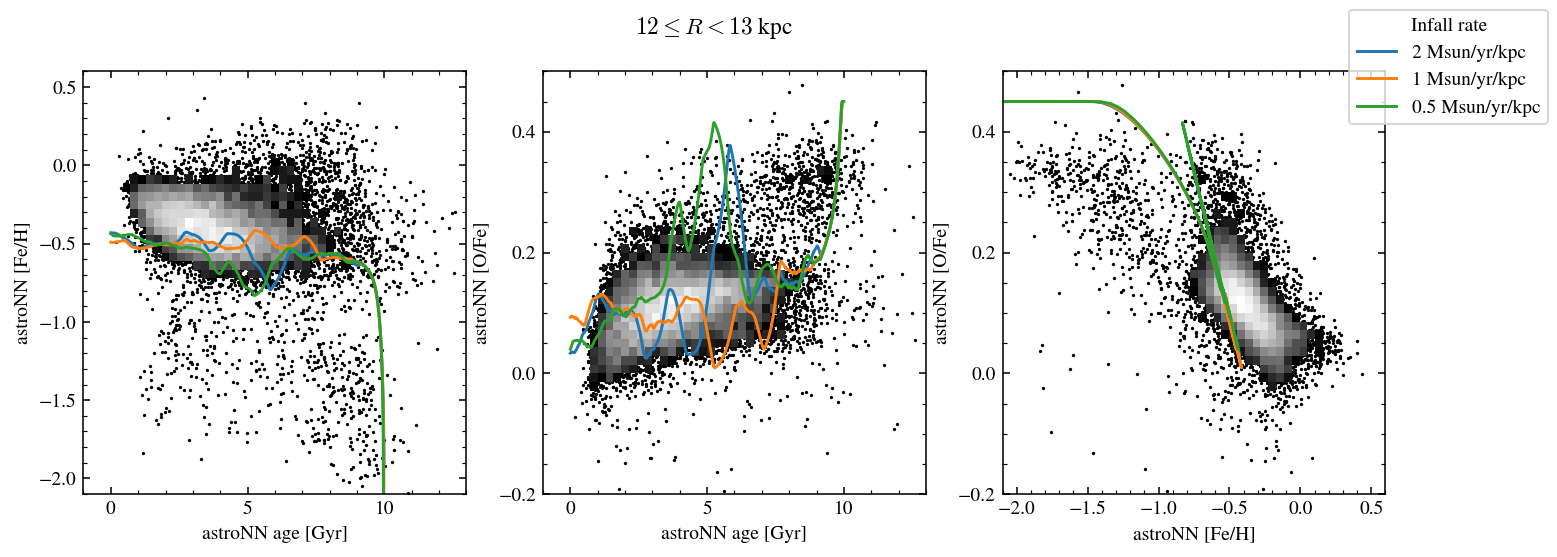

In [50]:
single_zone_plot(['high_ifr', 'fiducial', 'low_ifr'], 12, labels=['2 Msun/yr/kpc', '1 Msun/yr/kpc', '0.5 Msun/yr/kpc'], legend_title='Infall rate')

[]

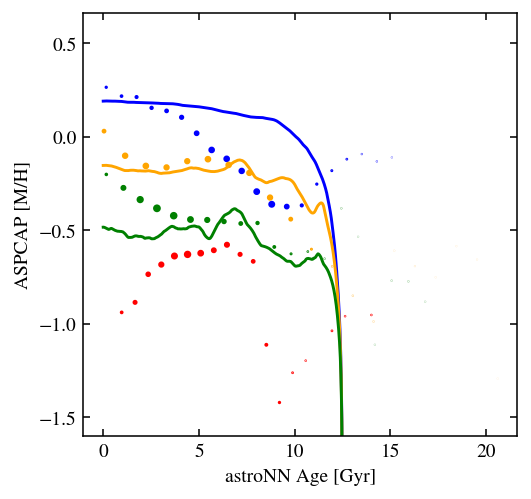

In [32]:
mw_out = vice.multioutput('milkyway/fiducial')

fig, ax = plt.subplots()

colors = ['b', 'orange', 'g', 'r', 'k']
for i, z in enumerate([4, 8, 12, 16]):
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)][['ASTRONN_AGE', 'M_H']]
    # Bin by age
    ages, age_bins = pd.cut(data_zone['ASTRONN_AGE'], 20, retbins=True)
    # Median [M/H] for each age bin
    median = data_zone['M_H'].groupby(ages).median()
    frac = data_zone['M_H'].groupby(ages).count() / data_zone.shape[0]
    # Plot median [M/H]
    ax.scatter(age_bins[:-1], median, marker='o', s=frac*50, color=colors[i])
    
    # Import VICE zone
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback']), vice_hist['[fe/h]'], color=colors[i])

ax.set_ylim((-1.6, None))
ax.set_xlabel('astroNN Age [Gyr]')
ax.set_ylabel('ASPCAP [M/H]')
plt.plot()

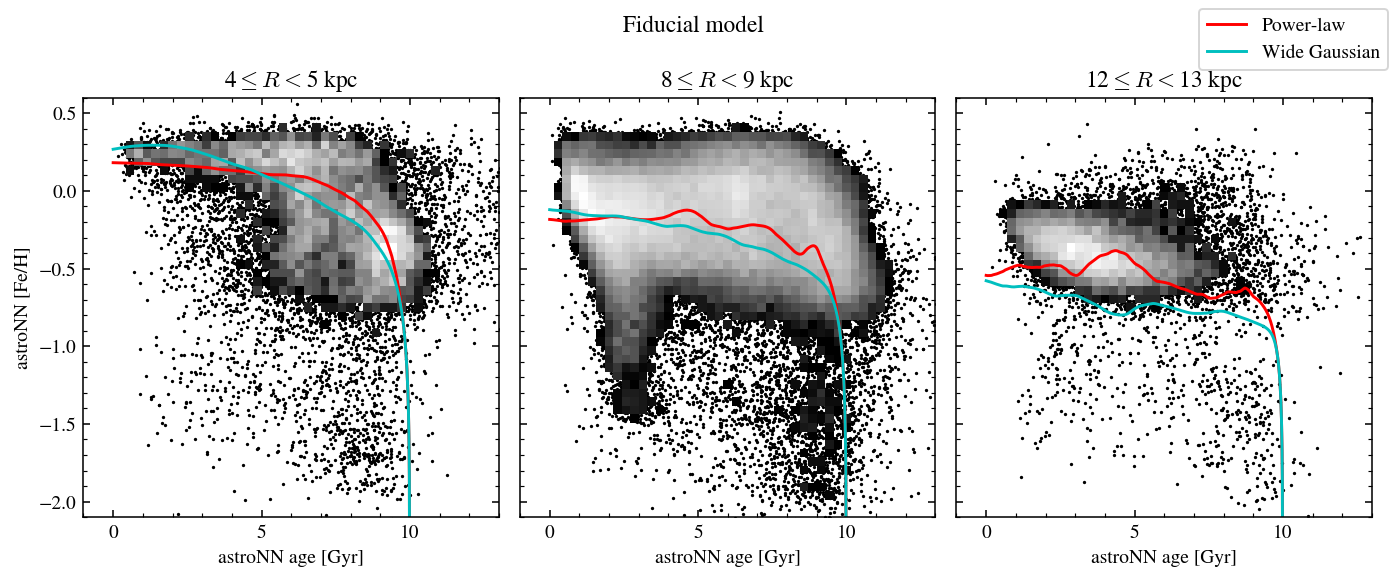

In [99]:
multi_zone_plot(['fiducial', 'wide_gauss'], 'age', 'met', title='Fiducial model', labels=['Power-law', 'Wide Gaussian'], fmt=['r', 'c'])

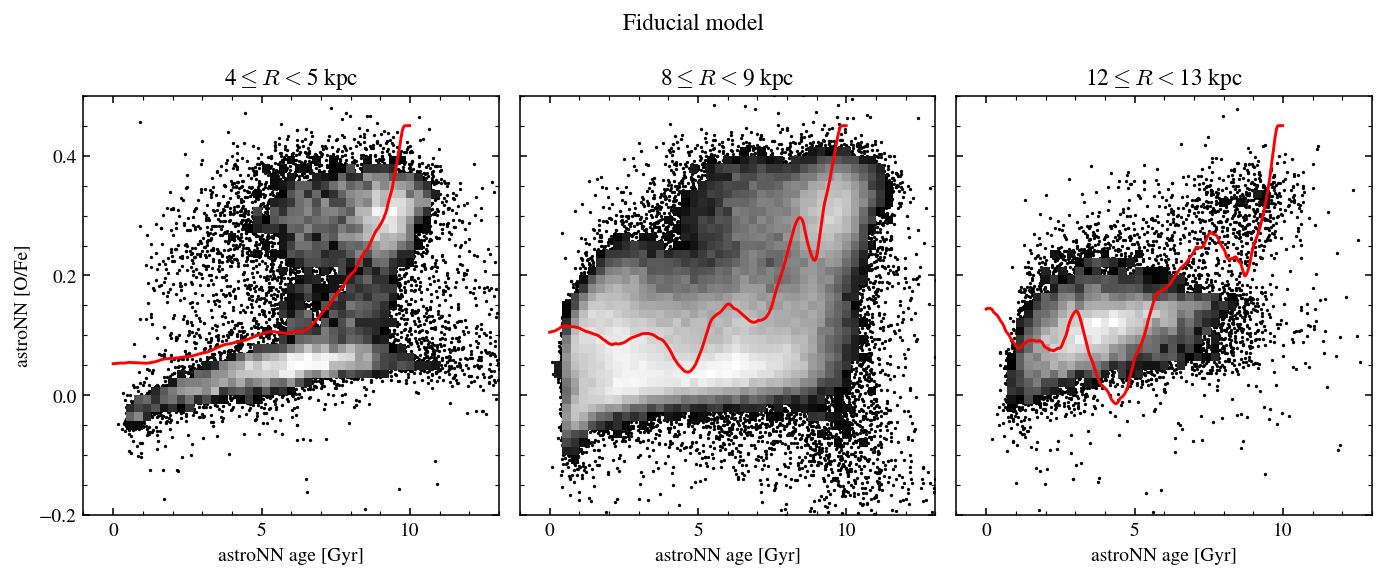

In [22]:
multi_zone_plot('fiducial', 'age', 'alpha', title='Fiducial model')

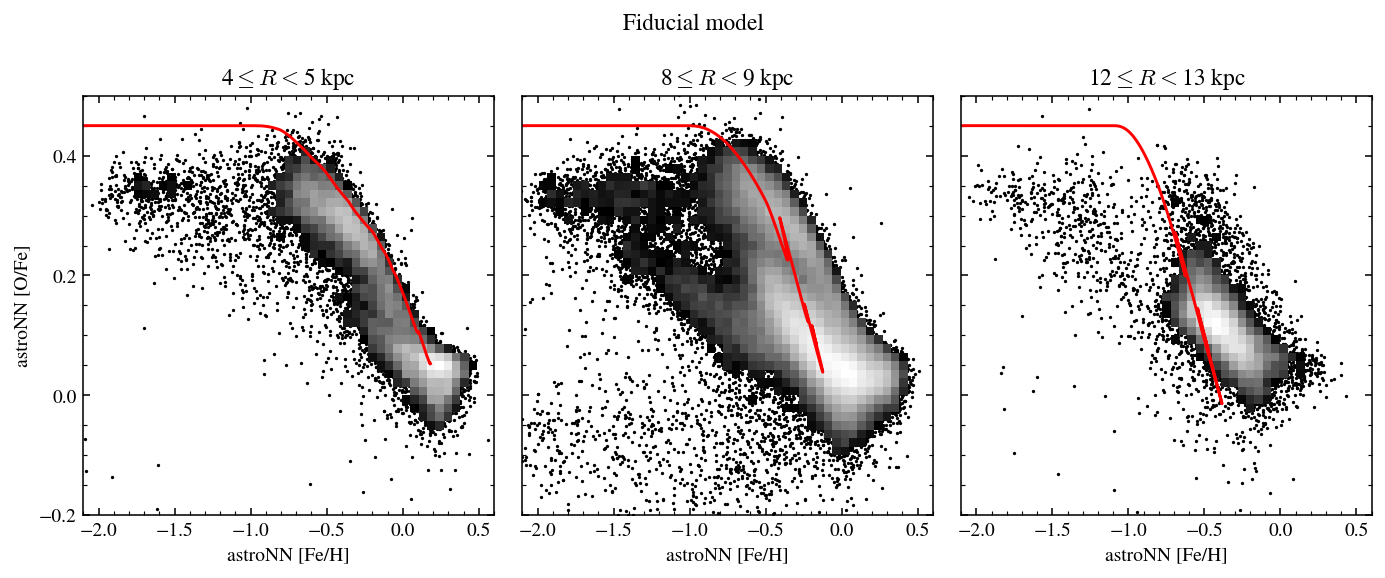

In [23]:
multi_zone_plot('fiducial', 'met', 'alpha', title='Fiducial model')

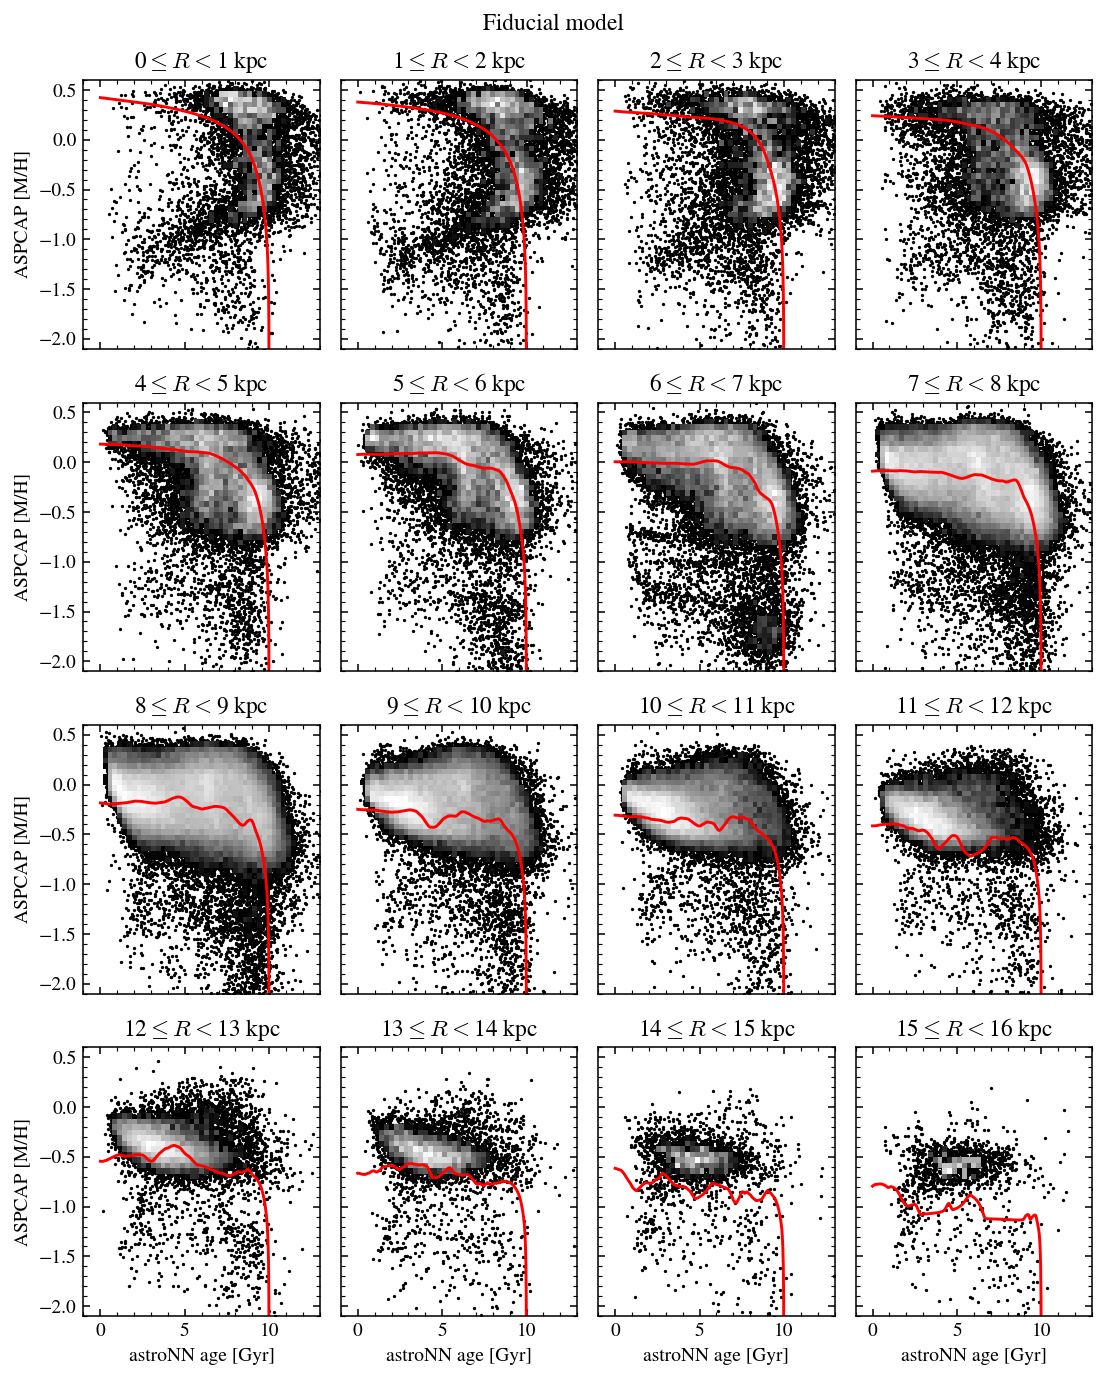

In [46]:
multi_zone_plot('fiducial', 'age', 'met', zones=list(range(16)), nrows=4, title='Fiducial model', data_source='ASPCAP', width=8)

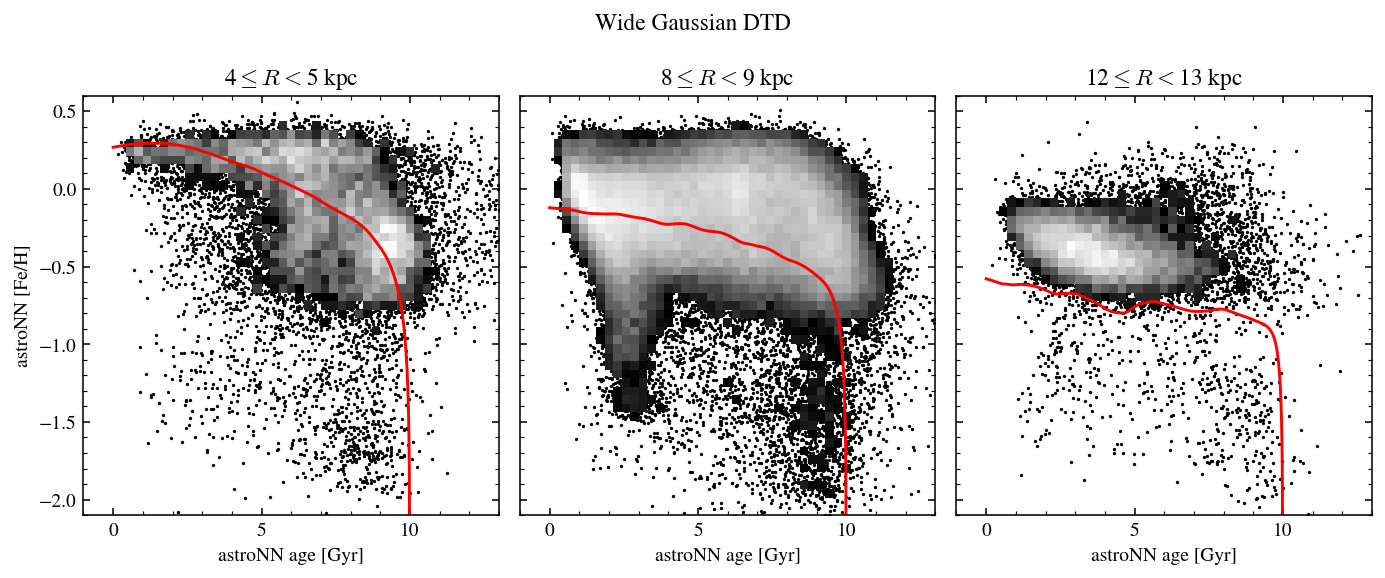

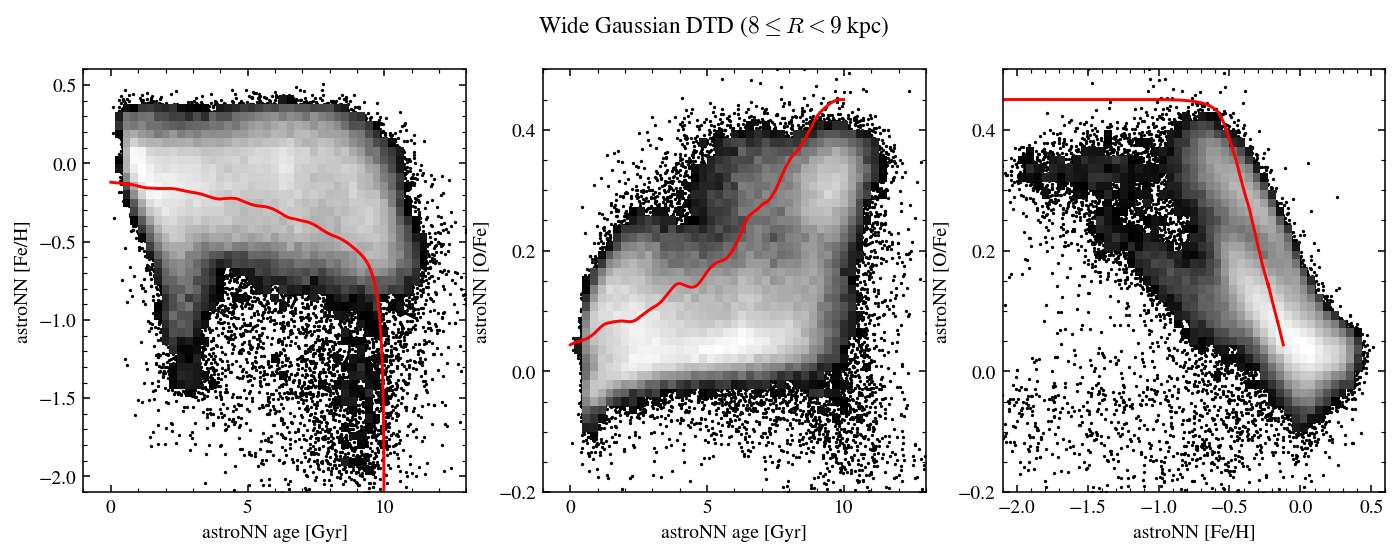

In [44]:
multi_zone_plot('wide_gauss', 'age', 'met', title='Wide Gaussian DTD')
single_zone_plot('wide_gauss', 8, title=r'Wide Gaussian DTD ($8\leq R<9$ kpc)')

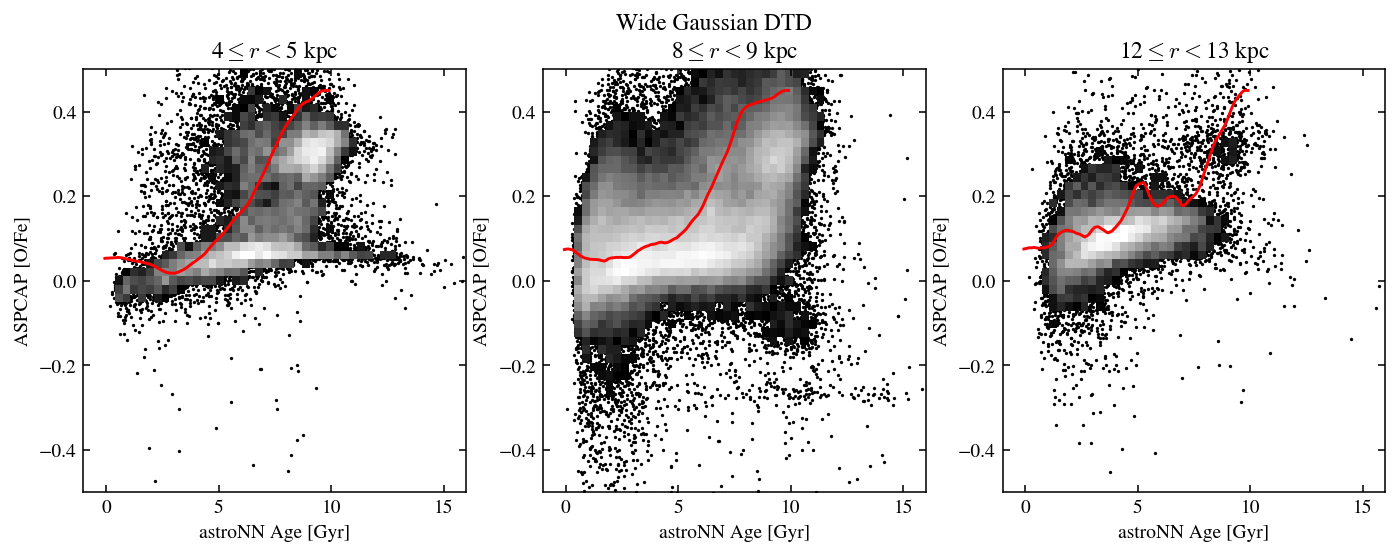

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

mw_out = vice.output('mw_wide')
for i, z in enumerate([4, 8, 12]):
    ax = axs[i]
    xlim = (-1, 16)
    ylim = (-0.5, 0.5)
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone['O_FE'], xlim=xlim, ylim=ylim)
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback'][:201]) - 2.5, vice_hist['[o/fe]'][:201], color='r')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('astroNN Age [Gyr]')
    ax.set_ylabel('ASPCAP [O/Fe]')
    ax.set_title(r'%s$\leq r <$%s kpc' % (z, z+1))
fig.suptitle('Wide Gaussian DTD')
plt.show()

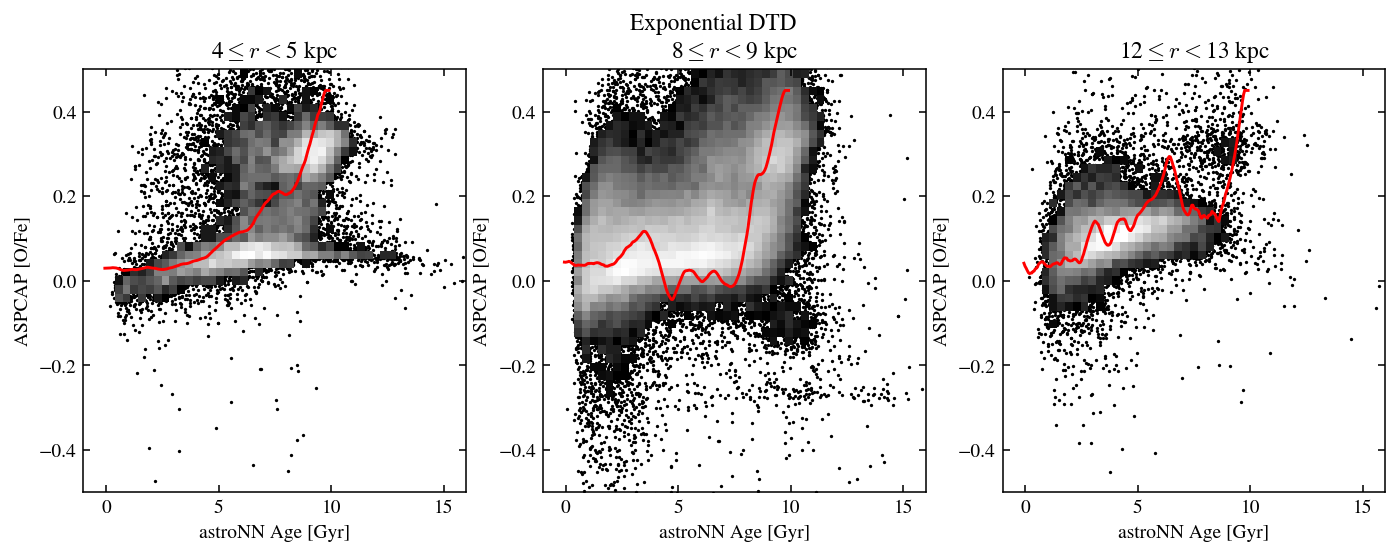

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

mw_out = vice.output('mw_exp')
for i, z in enumerate([4, 8, 12]):
    ax = axs[i]
    xlim = (-1, 16)
    ylim = (-0.5, 0.5)
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone['O_FE'], xlim=xlim, ylim=ylim)
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback'][:201]) - 2.5, vice_hist['[o/fe]'][:201], color='r')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('astroNN Age [Gyr]')
    ax.set_ylabel('ASPCAP [O/Fe]')
    ax.set_title(r'%s$\leq r <$%s kpc' % (z, z+1))
fig.suptitle('Exponential DTD')
plt.show()

In [12]:
mw_ = vice.milkyway(name='mw_high_eta', N=2e5, zone_width=1.0)
mw_exp.RIa = 'exp'
mw_exp.tau_ia = 1.5
mw_exp.dt = 0.05
out = mw_exp.run(np.linspace(0, 12.5, 251), capture = True)

NameError: name 'mw_exp' is not defined